# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

## Second notebook on Random variables

Lets take a look again at the spam dataset and look at our concepts there

In [2]:
from Utils import load_sms
sms_data = load_sms()
sms_data[:2]

[('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  0),
 ('Ok lar... Joking wif u oni...', 0)]

Let X represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS. 
Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.

To do this we can create a new random variable $Z$ which is $1$ if "free" or "prize" appears in $X$.

In [3]:
interesting_words=set(['free','prize'])
TF10 = {True: 1, False: 0}
Z_obs = [TF10[not interesting_words.isdisjoint([word.lower() for word in line[0].split(' ')])] for line in sms_data]

In [4]:
Z_obs[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 1]

In [5]:
Y_obs = [y for x,y in sms_data]
Y_obs[:10]

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

In [42]:
import numpy as np
def F_X_12(x):
    TF10 = {True: 1, False: 0}
    return np.mean([TF10[(y <= x[0]) and (z <= x[1])] for y,z in zip (Y_obs,Z_obs)])

In [7]:
F_X_12([1,0])

0.9551328068916008

This is the JDF for this problem

In [8]:
print("\tz <= 0 \t\tz <= 1")
for x1 in range(0,2):
    print("y <= %d \t" % x1,end='')
    for x2 in range(0,2):
        print("%.2f" % (F_X_12((x1,x2))),end='\t\t')
    print('\n')

	z <= 0 		z <= 1
y <= 0 	0.86		0.87		

y <= 1 	0.96		1.00		



In [9]:
F_X_12((1,0))

0.9551328068916008

In [10]:
F_X_12((0,0)) == F_X_12((0,1))*F_X_12((1,0))

False

In [11]:
F_X_12((0,1))*F_X_12((1,0))

0.8270846721557743

In [12]:
# Are they indepdentent? If so, then the JDF is just the product of the 
# DFs for Y and Z, but
0.865936826992103*0.955132806891601

0.827084672155774

Which is not 0.858, so they are not independent. So lets try to estimate the probability that $Y=1$ given that $Z = 1$. Lets again do that by filtering

In [13]:
np.mean([y for z,y in zip(Z_obs,Y_obs) if z == 1])

0.812

Compare that with the marginal probability of $Y = 1$, which is according to our JDF 1-0.866 = 0.134

In [14]:
# Or we can just compute it directly
np.mean(Y_obs)

0.13406317300789664

What we see from this is that knowing that the words "free" or "prize" appeared in the sms text, we are much more certain that it is a spam. We also see that looking directly at the JDF this can be hard to see, although it is equivalent.

In [15]:
x = np.random.normal(size=100)

In [16]:
np.mean(x)

0.04561858821557472

In [17]:
g = lambda x: x**2

In [18]:
mean = np.mean(x)
y = x-mean
np.mean(y**4)

1.6260120514678769

## Moments etc

In [19]:
import numpy as np
x = np.random.normal(size=100)

In [20]:
x

array([-1.22291914,  0.53768939, -0.72289669, -0.89019148, -0.8876077 ,
        2.88571187, -1.10172112, -2.51704066,  0.45305705, -0.6052331 ,
       -1.71131255, -1.29306263,  0.55007729,  0.73898827,  0.90588746,
        0.5971698 , -1.25333088, -0.09789098,  0.34384329,  0.28984261,
       -0.11701656,  0.90163377,  1.33931652,  0.36687143, -1.25308304,
        0.66595085, -0.33352097,  1.24481012,  0.46958754, -0.22879533,
        0.7844481 ,  0.04350387, -0.00841154,  0.40821171, -0.17252104,
        0.3358522 ,  0.01843658, -0.38951818, -2.10256781, -0.83682425,
        0.59525073,  1.47422538, -0.53159199,  0.2484546 ,  1.56196491,
        0.40650907, -1.51476428, -0.44613921, -0.33110111,  0.49772095,
       -2.01935716,  1.835503  , -1.16036087,  0.91053868, -0.08722916,
        2.01706113,  0.48998584,  0.7974022 ,  1.24293012, -0.51307268,
       -2.11270099, -1.74617659, -0.15496138, -0.04902603,  1.42727596,
        0.48930572,  0.45698549, -0.13124256, -0.97276067, -0.49

## Sample mean

In [21]:
np.mean(x)

0.030760660234373106

## Sample variance

In [22]:
np.var(x)

1.142596738633471

Or by doing it yourself

In [23]:
mu = np.mean(x)
np.mean(np.power(x-mu,2))

1.142596738633471

Higher moments, we can use `scipy`

In [24]:
from scipy.stats import skew, kurtosis

In [25]:
skew(x)

-0.08658793824814505

In [26]:
kurtosis(x,fisher=False)

2.8347121409622553

## Moments and tail behavior

In [27]:
def standardize(data):
    mean = np.mean(data)
    std = np.sqrt(np.var(data))
    return (data-mean)/std

(-3.0, 5.0)

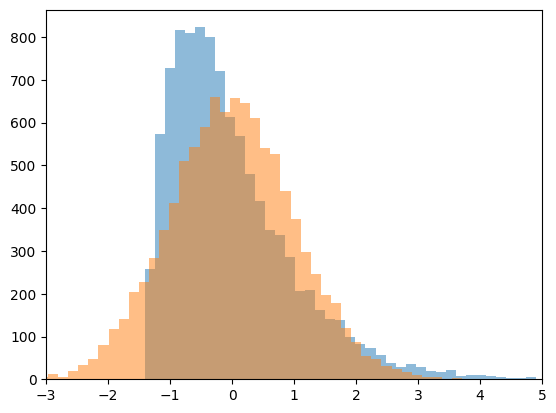

In [28]:
import numpy as np
chi2 = np.random.chisquare(4,size=10000)
normal = np.random.normal(size=10000)
import matplotlib.pyplot as plt
_=plt.hist(standardize(chi2),bins=50,alpha=0.5)
_=plt.hist(standardize(normal),bins=50,alpha=0.5)
plt.xlim(-3,5)

In [29]:
from scipy.stats import skew, kurtosis
def print_basic_stats(data):
    print("mean: %.2f\tstd: %.2f\tskew: %.2f\tkurtosis: %.2f" % (np.mean(data),np.std(data),skew(data),kurtosis(data,fisher=False)))

In [30]:
print_basic_stats(standardize(normal))

mean: 0.00	std: 1.00	skew: 0.06	kurtosis: 3.04


In [31]:
print_basic_stats(standardize(chi2))

mean: -0.00	std: 1.00	skew: 1.39	kurtosis: 5.83


In [32]:
print_basic_stats(standardize(np.sqrt(chi2)))

mean: -0.00	std: 1.00	skew: 0.41	kurtosis: 3.04


In [33]:
np.mean(np.power(standardize(chi2),3)) # Skewness

1.3940723938812754

In [34]:
np.mean(np.power(standardize(chi2),4)) # kurtosis

5.825326621768446

## Transformations of random variables

Consider a Binomial random variable

In [43]:
n = 10
p = 0.5
x = np.random.binomial(n,p,size=1000)

Lets plot the empirical density

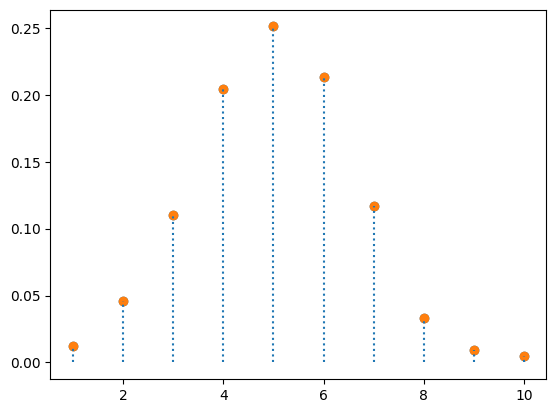

In [44]:
from Utils import makeEMF,makeEDF,plotEDF,plotEMF
plotEMF(makeEMF(x))

If we had the function $g(x) = \sin(x/3)$

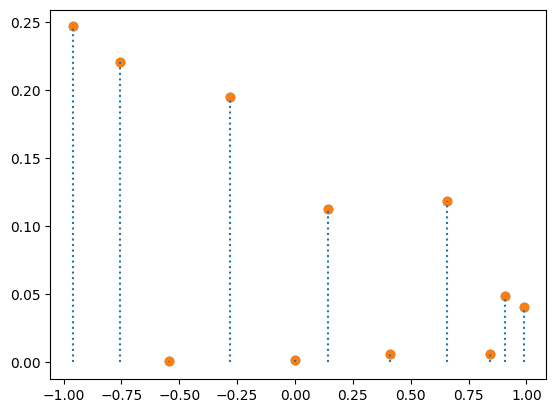

In [37]:
plotEMF(makeEMF(np.sin(x)))

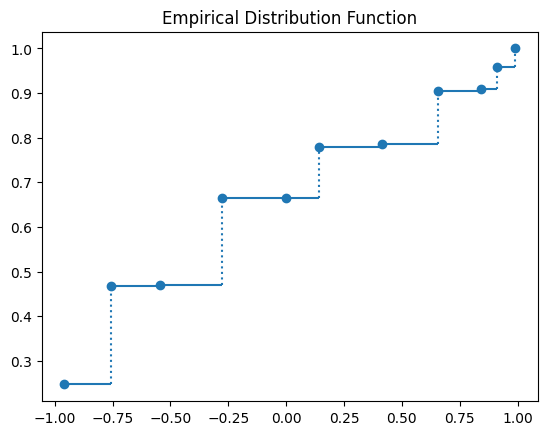

In [38]:
plotEDF(makeEDF(np.sin(x)))

Can we compute this thing?
What is $\sin^{[-1]}$?

Since $X$ is discrete, we can check what $\mathbb{Y}$ is, since $\mathbb{X}=\{0,1,\ldots,10\}$.

In [39]:
Y_space = np.sort(np.sin(np.arange(0,11)))
sin_inv = dict(zip(np.sin(np.arange(0,11)),np.arange(0,11)))

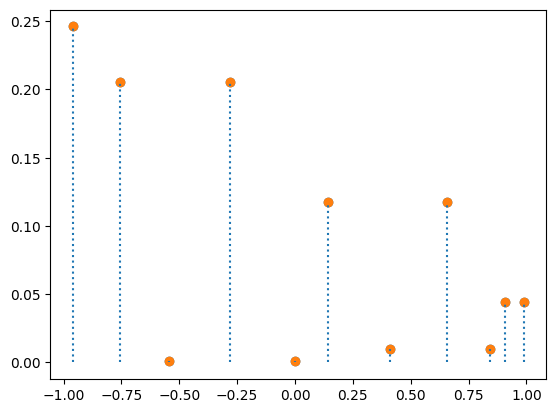

In [40]:
from scipy.special import binom as binomial
plotEMF([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space])

In [45]:
plotEDF(emfToEdf([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space]))

NameError: name 'emfToEdf' is not defined